In [5]:
%pylab inline
from itertools import combinations
import numpy as np
import pandas as pd
import networkx as nx

from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.model_selection import train_test_split, cross_val_score, KFold


Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset = pd.read_csv('/Users/alex/Documents/proteomics/synthetic_proteomics/generated_data/ludwig_svd_normals/hsa00020_inbiomap_exp.csv', index_col=0)
dataset

,ZNF91,NDEL1,ELAVL1,SUMO1,SUMO3,CHMP5,UBC,HTT,E2F4,ACP5,...,SPANXN4,ZNF605,SERPINB10,ANKAR,RRH,DHH,CYSLTR1,ZNF268,COL23A1,MEDAG
hsa00020,0.0,-0.261034,-0.225470,-0.133166,-0.078776,0.014914,0.0,-0.206717,0.174834,-0.404260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa00020,0.0,0.107220,-0.661096,0.450515,0.405213,-0.301713,-0.0,0.223274,-0.004873,-0.118222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa00020,0.0,-0.097608,-0.416602,0.316067,0.081976,0.165054,-0.0,0.015708,-0.485494,0.310790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa00020,-0.0,-0.235751,-0.719992,0.480963,0.038214,-0.082934,-0.0,-0.314944,0.116680,-0.023868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa00020,-0.0,-0.050073,0.153169,-0.092892,1.193852,0.870265,0.0,-0.637075,0.091811,-0.143549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,0.0,-0.307733,0.495937,-0.285199,0.020728,-0.359426,-0.0,-0.596293,0.448115,-0.123623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,0.0,0.291386,-0.035096,0.547740,-0.219327,0.348358,-0.0,-0.159170,0.562026,-0.710928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa00020,0.0,0.490731,0.266025,0.308459,-0.267459,-0.092319,-0.0,0.142149,-0.591713,0.318528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,-0.0,-0.047210,0.001143,0.097162,0.473758,0.062236,0.0,-0.461248,-0.354914,0.075039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa00020,0.0,-0.359726,-0.087243,-0.039744,0.634126,-0.083938,0.0,-0.221046,0.013232,0.162082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
labels = dataset.index.tolist()
labels

['hsa00020',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'negative',
 'negative',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'negative',
 'hsa00020',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'negative',
 'negative',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'negative',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'negative',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'hsa00020',
 'negative',
 'negative',

In [4]:
labeler = LabelEncoder()
labeler.fit(labels)
labels = labeler.transform(dataset.index.tolist())
y = labels
y

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [44]:
plsr = PLSRegression(n_components=2, scale=False, tol=1)
plsr.fit(dataset.values, y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1)

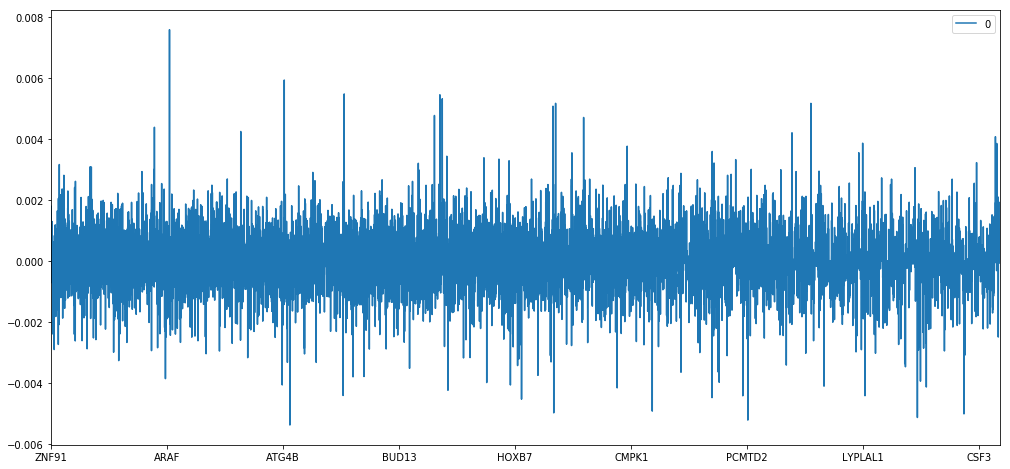

In [43]:
pd.DataFrame(plsr.coef_, index=dataset.columns).plot(figsize=(17,8))

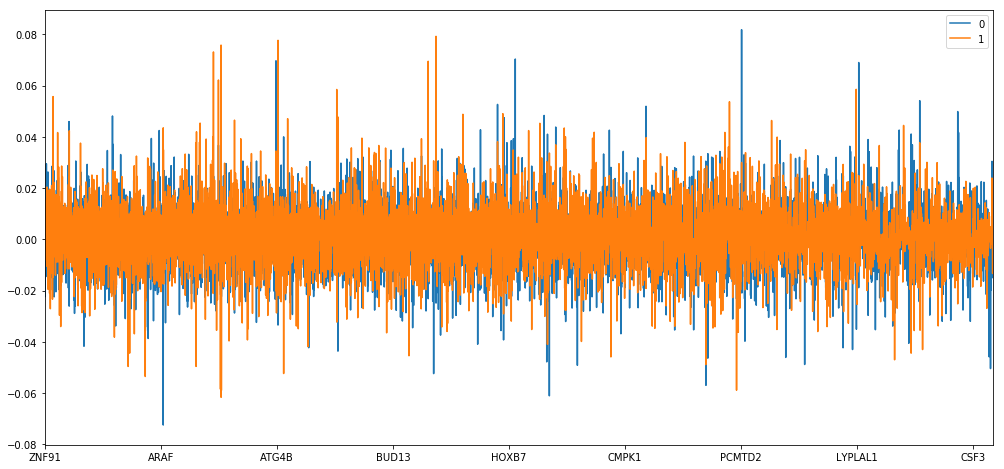

In [40]:
pd.DataFrame(plsr.x_weights_, index=dataset.columns).plot(figsize=(17,8))

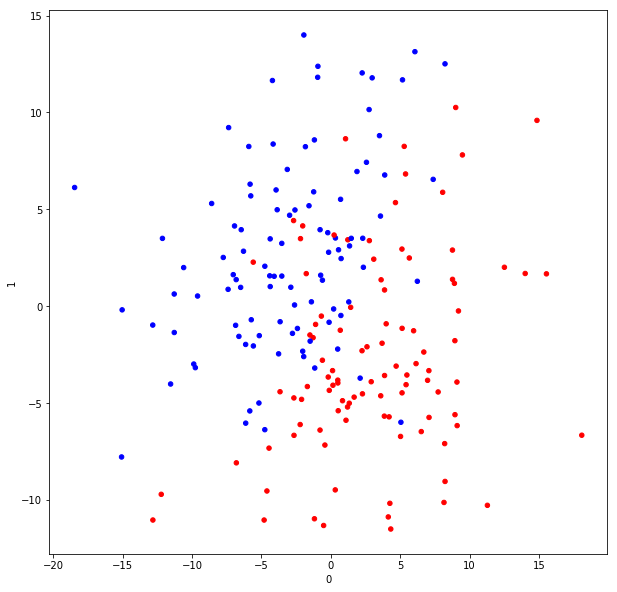

In [41]:
pd.DataFrame(plsr.x_scores_).plot.scatter(0, 1, figsize=(10,10), c=[('blue' if x==1 else 'red') for x in y])